example list
 0 -- Dense CRF example for a binary segmentation
 1 -- Dense CRF example for a multi-class segmentation
please enter the index of an example:


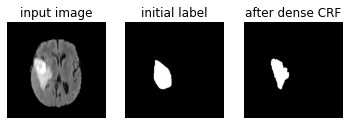

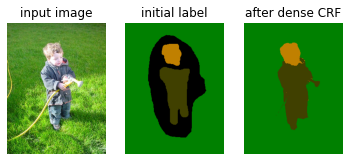

In [10]:
import denseCRF
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def densecrf(I, P, param):
    """
    input parameters:
        I    : a numpy array of shape [H, W, C], where C should be 3.
               type of I should be np.uint8, and the values are in [0, 255]
        P    : a probability map of shape [H, W, L], where L is the number of classes
               type of P should be np.float32
        param: a tuple giving parameters of CRF (w1, alpha, beta, w2, gamma, it), where
                w1    :   weight of bilateral term, e.g. 10.0
                alpha :   spatial distance std, e.g., 80
                beta  :   rgb value std, e.g., 15
                w2    :   weight of spatial term, e.g., 3.0
                gamma :   spatial distance std for spatial term, e.g., 3
                it    :   iteration number, e.g., 5
    output parameters:
        out  : a numpy array of shape [H, W], where pixel values represent class indices. 
    """
    out = denseCRF.densecrf(I, P, param) 
    return out   

def convert_label_to_probability_map(label, color_list):
    [H, W, _] = label.shape
    C = len(color_list)
    prob  = np.zeros([H, W, len(color_list)], np.float32) 
    for h in range(H):
        for w in range(W):
            ca = label[h, w, :]
            if sum(ca) == 0:
                for c in range(C):
                    prob[h, w, c] = 1.0 / C
            else:
                for c in range(C):
                    cb = color_list[c]
                    if(ca[0]==cb[0] and ca[1]==cb[1] and ca[2]==cb[2]):
                        prob[h, w, c] = 1.0
                        break
    return prob 

def colorize_label_map(label, color_list):
    [H, W] = label.shape
    out = np.zeros((H, W, 3), np.uint8)
    for h in range(H):
        for w in range(W):
            idx = label[h, w] 
            color = np.asarray(color_list[idx])
            out[h, w, :] = color
    return out

def demo_densecrf1(image_path, label_path):
    I  = Image.open(image_path)
    Iq = np.asarray(I)
    
    # load initial labels, and convert it into an array 'prob' with shape [H, W, C]
    # where C is the number of labels
    # prob[h, w, c] means the probability of pixel at (h, w) belonging to class c.
    L  = Image.open(label_path)
    Lq = np.asarray(L, np.float32) / 255
    prob = Lq[:, :, :2]
    prob[:, :, 0] = 1.0 - prob[:, :, 0]

    w1    = 10.0  # weight of bilateral term
    alpha = 80    # spatial std
    beta  = 13    # rgb  std
    w2    = 3.0   # weight of spatial term
    gamma = 3     # spatial std
    it    = 5.0   # iteration
    param = (w1, alpha, beta, w2, gamma, it)
    lab = densecrf(Iq, prob, param)
    lab = Image.fromarray(lab*255)
    plt.subplot(1,3,1); plt.axis('off'); plt.imshow(I); plt.title('input image')
    plt.subplot(1,3,2); plt.axis('off'); plt.imshow(L); plt.title('initial label')
    plt.subplot(1,3,3); plt.axis('off'); plt.imshow(lab); plt.title('after dense CRF')
    plt.show()

def demo_densecrf2(image_path, label_path):
    I  = Image.open(image_path)
    Iq = np.asarray(I, np.uint8)
    
    # load initial labels, and convert it into an array 'prob' with shape [H, W, C]
    # where C is the number of labels
    # prob[h, w, c] means the probability of pixel at (h, w) belonging to class c.
    L  = Image.open(label_path)
    Lq = np.asarray(L, np.float32)
    color_list = [[0, 128, 0], [192, 128, 0], [64, 64, 0]] 
    prob = convert_label_to_probability_map(Lq, color_list)
   
    w1    = 10.0  # weight of bilateral term
    alpha = 80    # spatial std
    beta  = 13    # rgb  std
    w2    = 3.0   # weight of spatial term
    gamma = 3     # spatial std
    it    = 5.0   # iteration
    param = (w1, alpha, beta, w2, gamma, it)
    lab = densecrf(Iq, prob, param)
    lab = colorize_label_map(lab, color_list)
    lab = Image.fromarray(lab)
    plt.subplot(1,3,1); plt.axis('off'); plt.imshow(I); plt.title('input image')
    plt.subplot(1,3,2); plt.axis('off'); plt.imshow(L); plt.title('initial label')
    plt.subplot(1,3,3); plt.axis('off'); plt.imshow(lab); plt.title('after dense CRF')
    plt.show()

if __name__ == "__main__":
    print("example list")
    print(" 0 -- Dense CRF example for a binary segmentation")
    print(" 1 -- Dense CRF example for a multi-class segmentation")
    print("please enter the index of an example:")
    
    demo_densecrf1('simple/data/brain.png','simple/data/brain_mask.png')
#     demo_densecrf2('simple/dependency/densecrf/examples/im3.ppm','simple/dependency/densecrf/examples/anno3.ppm')
    
#     demo_densecrf1('/Users/admin/Desktop/projects/bts_img_seg/dataset/imgs/Image0001.jpg','/Users/admin/Desktop/projects/bts_img_seg/dataset/masks/Image0001.png')
# #     demo_densecrf2('/Users/admin/Desktop/projects/bts_img_seg/dataset/imgs/Image0001.jpg','/Users/admin/Desktop/projects/bts_img_seg/dataset/masks/Image0001.png')

example list
 0 -- 2D max flow without interactions
 1 -- 2D max flow with interactions
 2 -- 3D max flow without interactions
 3 -- 3D max flow with interactions
please enter the index of an example:
1


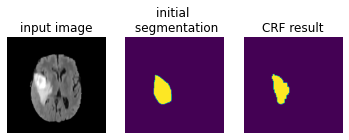

In [12]:

import numpy as np
import SimpleITK as sitk
import maxflow
from PIL import Image
import matplotlib.pyplot as plt

def maxflow2d(I, P, param):
    """
    maxflow for 2D image segmentation. Only binary segmentation is supported.
    input parameters:
        I    : a numpy array of shape [H, W], or [H, W, C] where C should be 3.
               type of I should be np.float32
        P    : a probability map of shape [H, W, L], where L==2 is the number of classes
               type of P should be np.float32
        param: a tuple giving parameters of CRF (lambda, sigma), where
                lambda :   weight of smooth term, e.g. 20.0
                sigma  :   std intensity value, e.g., 10
                
    output parameters:
        lab  : a numpy array of shape [H, W], where pixel values represent class indices. 
    """
    lab = maxflow.maxflow2d(I, P, param)
    return lab 

def interactive_maxflow2d(I, P, S, param):
    """
    maxflow for 2D interactive image segmentation. Only binary segmentation is supported.
    input parameters:
        I    : a numpy array of shape [H, W], or [H, W, C] where C should be 3.
               type of I should be np.float32
        P    : a probability map of shape [H, W, L], where L==2 is the number of classes
               type of P should be np.float32
        S    : a numpy array showing user interactions, shape should be [H, W, L], where L == 2
               type of S should be np.uint8
        param: a tuple giving parameters of CRF (lambda, sigma), where
                lambda :   weight of smooth term, e.g. 20.0
                sigma  :   std intensity value, e.g., 10
                
    output parameters:
        lab  : a numpy array of shape [H, W], where pixel values represent class indices. 
    """
    lab = maxflow.interactive_maxflow2d(I, P, S, param)
    return lab 

def maxflow3d(I, P, param):
    """
    maxflow for 3D image segmentation. Only binary segmentation is supported.
    input parameters:
        I    : a numpy array of shape [D, H, W], or [D, H, W, C] where C should be 3.
               type of I should be np.float32
        P    : a probability map of shape [D, H, W, L], where L==2 is the number of classes
               type of P should be np.float32
        param: a tuple giving parameters of CRF (lambda, sigma), where
                lambda :   weight of smooth term, e.g. 20.0
                sigma  :   std intensity value, e.g., 10
                
    output parameters:
        lab  : a numpy array of shape [D, H, W], where pixel values represent class indices. 
    """
    lab = maxflow.maxflow3d(I, P, param)
    return lab 

def interactive_maxflow3d(I, P, S, param):
    """
    maxflow for 3D interactive image segmentation. Only binary segmentation is supported.
    input parameters:
        I    : a numpy array of shape [D, H, W], or [D, H, W, C] where C should be 3.
               type of I should be np.float32
        P    : a probability map of shape [D, H, W, L], where L==2 is the number of classes
               type of P should be np.float32
        S    : a numpy array showing user interactions, shape should be [D, H, W, L], where L == 2
               type of S should be np.uint8
        param: a tuple giving parameters of CRF (lambda, sigma), where
                lambda :   weight of smooth term, e.g. 20.0
                sigma  :   std intensity value, e.g., 10
                
    output parameters:
        lab  : a numpy array of shape [D, H, W], where pixel values represent class indices. 
    """
    lab = maxflow.interactive_maxflow3d(I, P, S, param)
    return lab 

def demo_maxflow():
    I = Image.open('simple/data/brain.png')
    Iq = np.asarray(I.convert('L'), np.float32)
    # Iq = np.asarray(I, np.float32)
    P = np.asarray(Image.open('simple/data/brain_mask.png').convert('L'), np.float32) / 255

    fP = 0.5 + (P - 0.5) * 0.8
    bP = 1.0 - fP
    Prob = np.asarray([bP, fP])
    Prob = np.transpose(Prob, [1, 2, 0])
    lamda = 20.0  
    sigma = 10.0
    param = (lamda, sigma)
    lab = maxflow2d(Iq, Prob, param)

    plt.subplot(1,3,1); plt.axis('off'); plt.imshow(I);  plt.title('input image')
    plt.subplot(1,3,2); plt.axis('off'); plt.imshow(fP);   plt.title('initial \n segmentation')
    plt.subplot(1,3,3); plt.axis('off'); plt.imshow(lab); plt.title('CRF result')
    plt.show()

def demo_interactive_maxflow():
    I = Image.open('simple/data/brain.png')
    # Iq = np.asarray(I.convert('L'), np.float32)
    Iq = np.asarray(I, np.float32)
    P = np.asarray(Image.open('simple/data/brain_mask.png').convert('L'), np.float32) / 255

    fP = 0.5 + (P - 0.5) * 0.8
    bP = 1.0 - fP
    Prob = np.asarray([bP, fP])
    Prob = np.transpose(Prob, [1, 2, 0])

    S  = np.asarray(Image.open('simple/data/brain_scrb.png').convert('L'))
    Seed = np.asarray([S == 255, S == 170], np.uint8)
    Seed = np.transpose(Seed, [1, 2, 0])

    lamda = 30.0  
    sigma = 8.0
    param = (lamda, sigma)
    lab = interactive_maxflow2d(Iq, Prob, Seed, param)

    plt.subplot(1,3,1); plt.axis('off'); plt.imshow(I);  plt.title('input image')
    plt.subplot(1,3,2); plt.axis('off'); plt.imshow(fP);   plt.title('initial \n segmentation')
    plt.subplot(1,3,3); plt.axis('off'); plt.imshow(lab); plt.title('CRF result')
    plt.show()

def demo_maxflow3d():
    img_name   = "simple/data/2013_12_1_img.nii.gz"
    prob_name  = "simple/data/2013_12_1_init.nii.gz"
    save_name  = "simple/data/seg_auto.nii.gz"
    img_obj  = sitk.ReadImage(img_name)
    img_data = sitk.GetArrayFromImage(img_obj)
    img_data = np.asarray(img_data, np.float32)
    prob_obj = sitk.ReadImage(prob_name)
    prob_data = sitk.GetArrayFromImage(prob_obj)
    prob_data = np.asarray(prob_data, np.float32)

    fP = 0.5 + (prob_data - 0.5) * 0.8
    bP = 1.0 - fP
    Prob = np.asarray([bP, fP])
    Prob = np.transpose(Prob, [1, 2, 3, 0])

    lamda = 10.0
    sigma = 15.0
    param = (lamda, sigma)
    lab = maxflow3d(img_data, Prob, param)
    lab_obj = sitk.GetImageFromArray(lab)
    lab_obj.CopyInformation(img_obj)
    sitk.WriteImage(lab_obj, save_name)
    print('the segmentation has been saved to {0:}'.format(save_name))

def test_interactive_max_flow3d():
    img_name   = "simple/data/2013_12_1_img.nii.gz"
    prob_name  = "simple/data/2013_12_1_init.nii.gz"
    seed_name  = "simple/data/2013_12_1_scrb.nii.gz"
    save_name  = "simple/data/seg_interact.nii.gz"
    img_obj  = sitk.ReadImage(img_name)
    img_data = sitk.GetArrayFromImage(img_obj)
    img_data = np.asarray(img_data, np.float32)
    prob_obj = sitk.ReadImage(prob_name)
    prob_data = sitk.GetArrayFromImage(prob_obj)
    prob_data = np.asarray(prob_data, np.float32)

    fP = 0.5 + (prob_data - 0.5) * 0.8
    bP = 1.0 - fP
    Prob = np.asarray([bP, fP])
    Prob = np.transpose(Prob, [1, 2, 3, 0])

    seed_obj  = sitk.ReadImage(seed_name)
    seed_data = sitk.GetArrayFromImage(seed_obj)
    Seed = np.asarray([seed_data == 2, seed_data == 3], np.uint8)
    Seed = np.transpose(Seed, [1, 2, 3, 0])

    lamda = 10.0
    sigma = 15.0
    param = (lamda, sigma)
    lab = interactive_maxflow3d(img_data, Prob, Seed, param)
    lab_obj = sitk.GetImageFromArray(lab)
    lab_obj.CopyInformation(img_obj)
    sitk.WriteImage(lab_obj, save_name)
    print('the segmentation has been saved to {0:}'.format(save_name))

if __name__ == '__main__':
    print("example list")
    print(" 0 -- 2D max flow without interactions")
    print(" 1 -- 2D max flow with interactions")
    print(" 2 -- 3D max flow without interactions")
    print(" 3 -- 3D max flow with interactions")
    print("please enter the index of an example:")
    method = input()
    method = "{0:}".format(method)
    if(method == '0'):
        demo_maxflow()
    elif(method == '1'):
        demo_interactive_maxflow()
    elif(method == '2'):
        demo_maxflow3d()
    elif(method == '3'):
        test_interactive_max_flow3d()
    else:
        print("invalid number : {0:}".format(method))